In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1) 

sns.set_style("whitegrid")
sns.set_context("paper")

plt.rcParams['figure.figsize'] = (40,20)

In [34]:
df = pd.read_csv('./data/fut19.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df.columns

Index(['player_ID', 'player_name', 'player_extended_name', 'quality',
       'revision', 'origin', 'overall', 'club', 'league', 'nationality',
       'position', 'age', 'date_of_birth', 'height', 'weight', 'intl_rep',
       'added_date', 'pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning', 'pref_foot', 'att_w

In [36]:
df.quality.unique()

array(['Gold - Rare', 'Gold', 'Silver - Rare', 'Silver', 'Bronze - Rare',
       'Bronze'], dtype=object)

In [37]:
leaguesMean = df.loc[:,['league','price_ps4','overall']].groupby(['league']).mean()

In [38]:
leaguesMean.sort_values(by = ['overall'], ascending=True)

,price_ps4,overall
league,,
SSE Airtricity League,343.315508,58.294416
EFL League Two,424.775583,59.873311
Finnliiga,340.000000,60.666667
CSL,655.486284,62.199546
3. Liga,471.371769,62.242424
EFL League One,485.378151,62.575321
Hyundai A-League,473.842593,62.591743
Superliga,506.853583,62.711765
Meiji Yasuda J1 League,468.154158,62.884314


In [54]:
LEAGUE = 'Premier League'
MINQUALITY = 78

In [56]:
league0 = df.loc[(df['league'] == LEAGUE)]
league0.isnull().sum()

player_ID               0  
player_name             0  
player_extended_name    0  
quality                 0  
revision                164
origin                  728
overall                 0  
club                    0  
league                  0  
nationality             0  
position                0  
age                     0  
date_of_birth           0  
height                  0  
weight                  0  
intl_rep                0  
added_date              0  
pace                    76 
pace_acceleration       0  
pace_sprint_speed       0  
dribbling               76 
drib_agility            0  
drib_balance            0  
drib_reactions          0  
drib_ball_control       0  
drib_dribbling          0  
drib_composure          0  
shooting                76 
shoot_positioning       0  
shoot_finishing         0  
                       ..  
gk_handling             662
gk_speed                662
gk_kicking              662
gk_positoning           662
pref_foot           

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


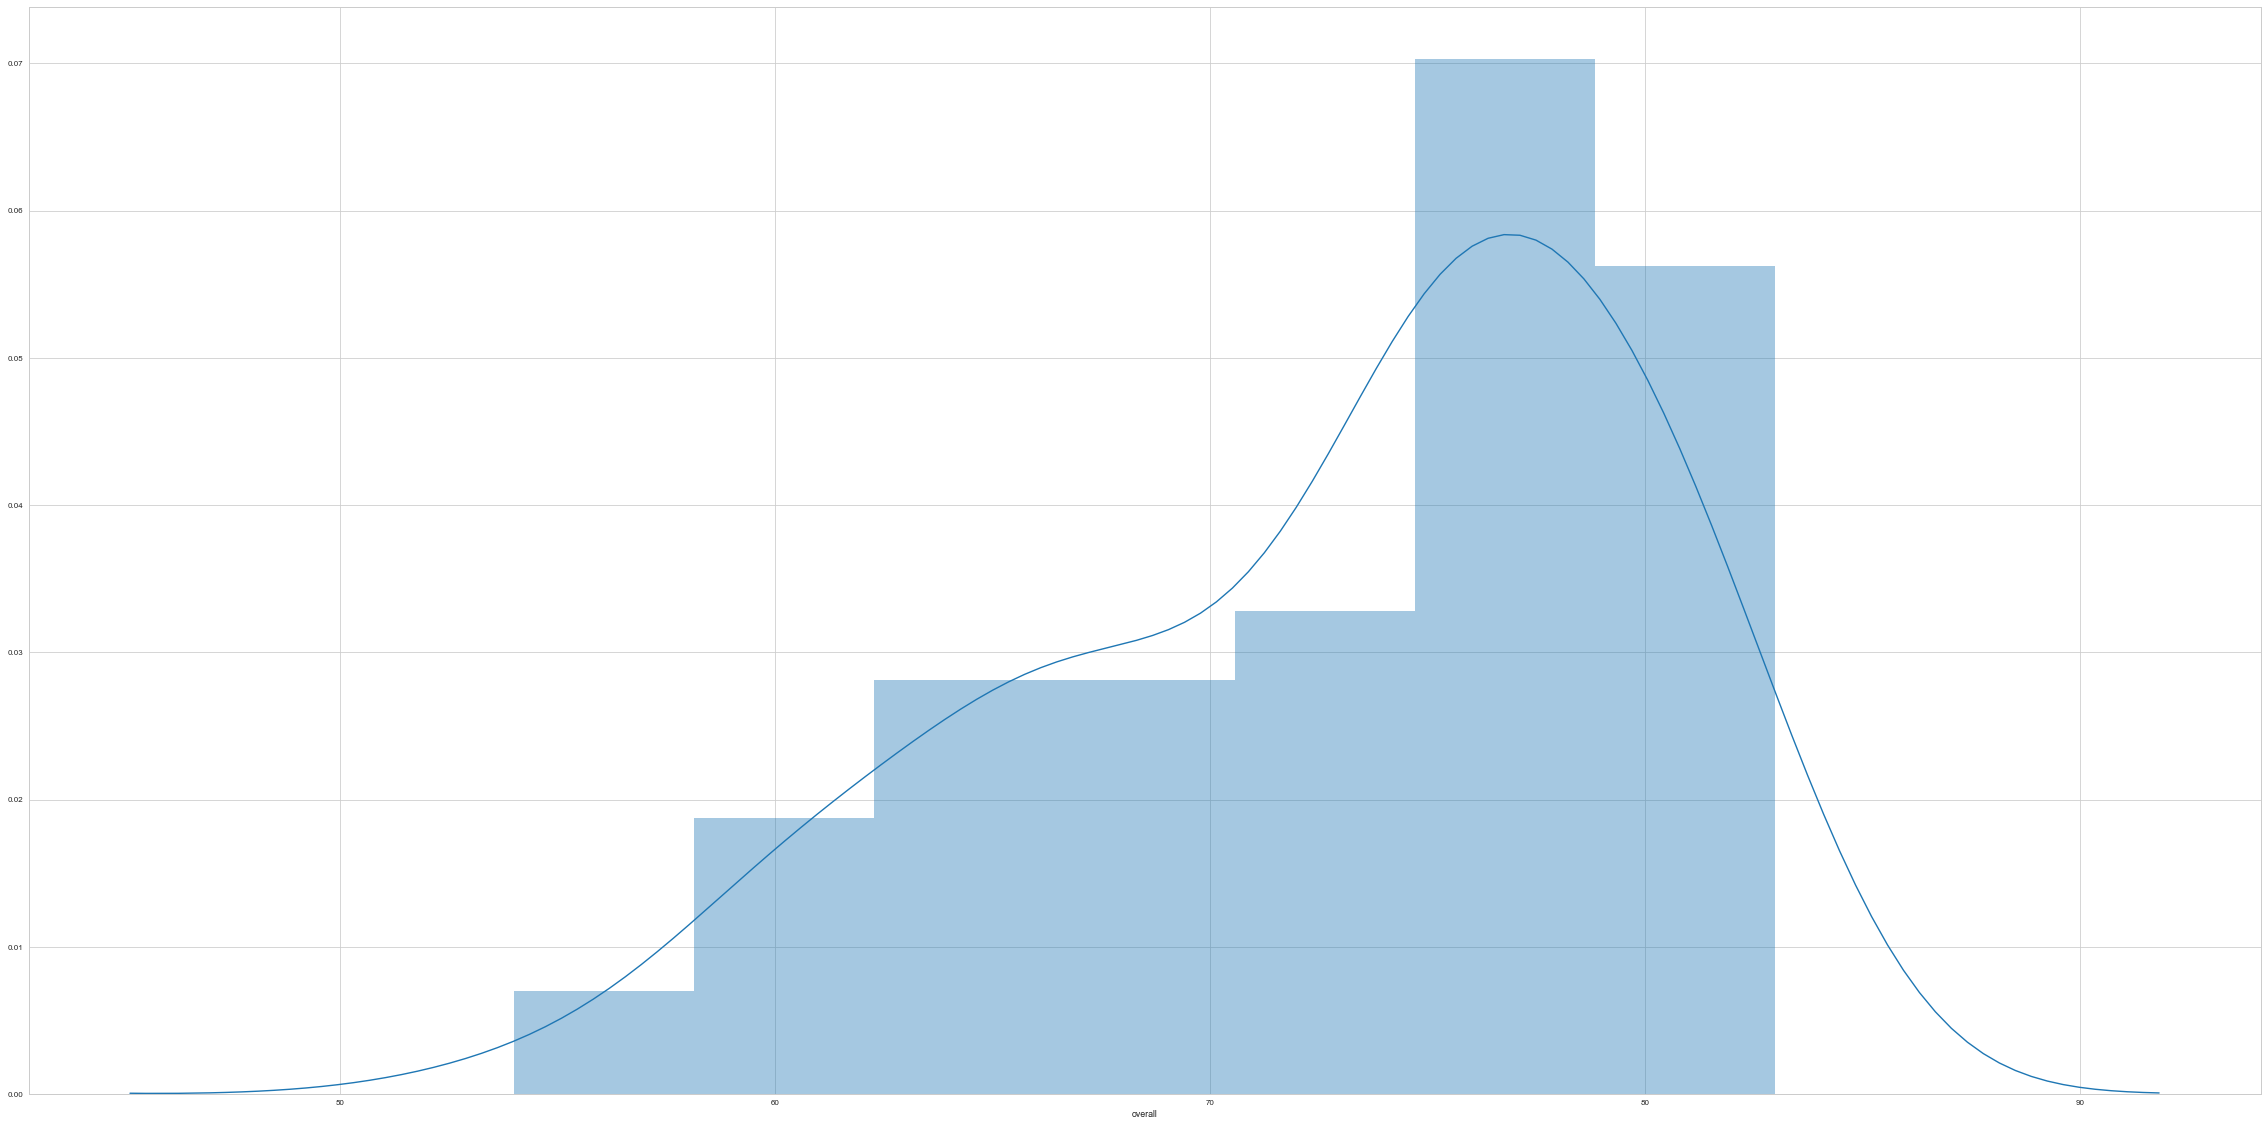

In [41]:
sns.distplot(league0.overall)

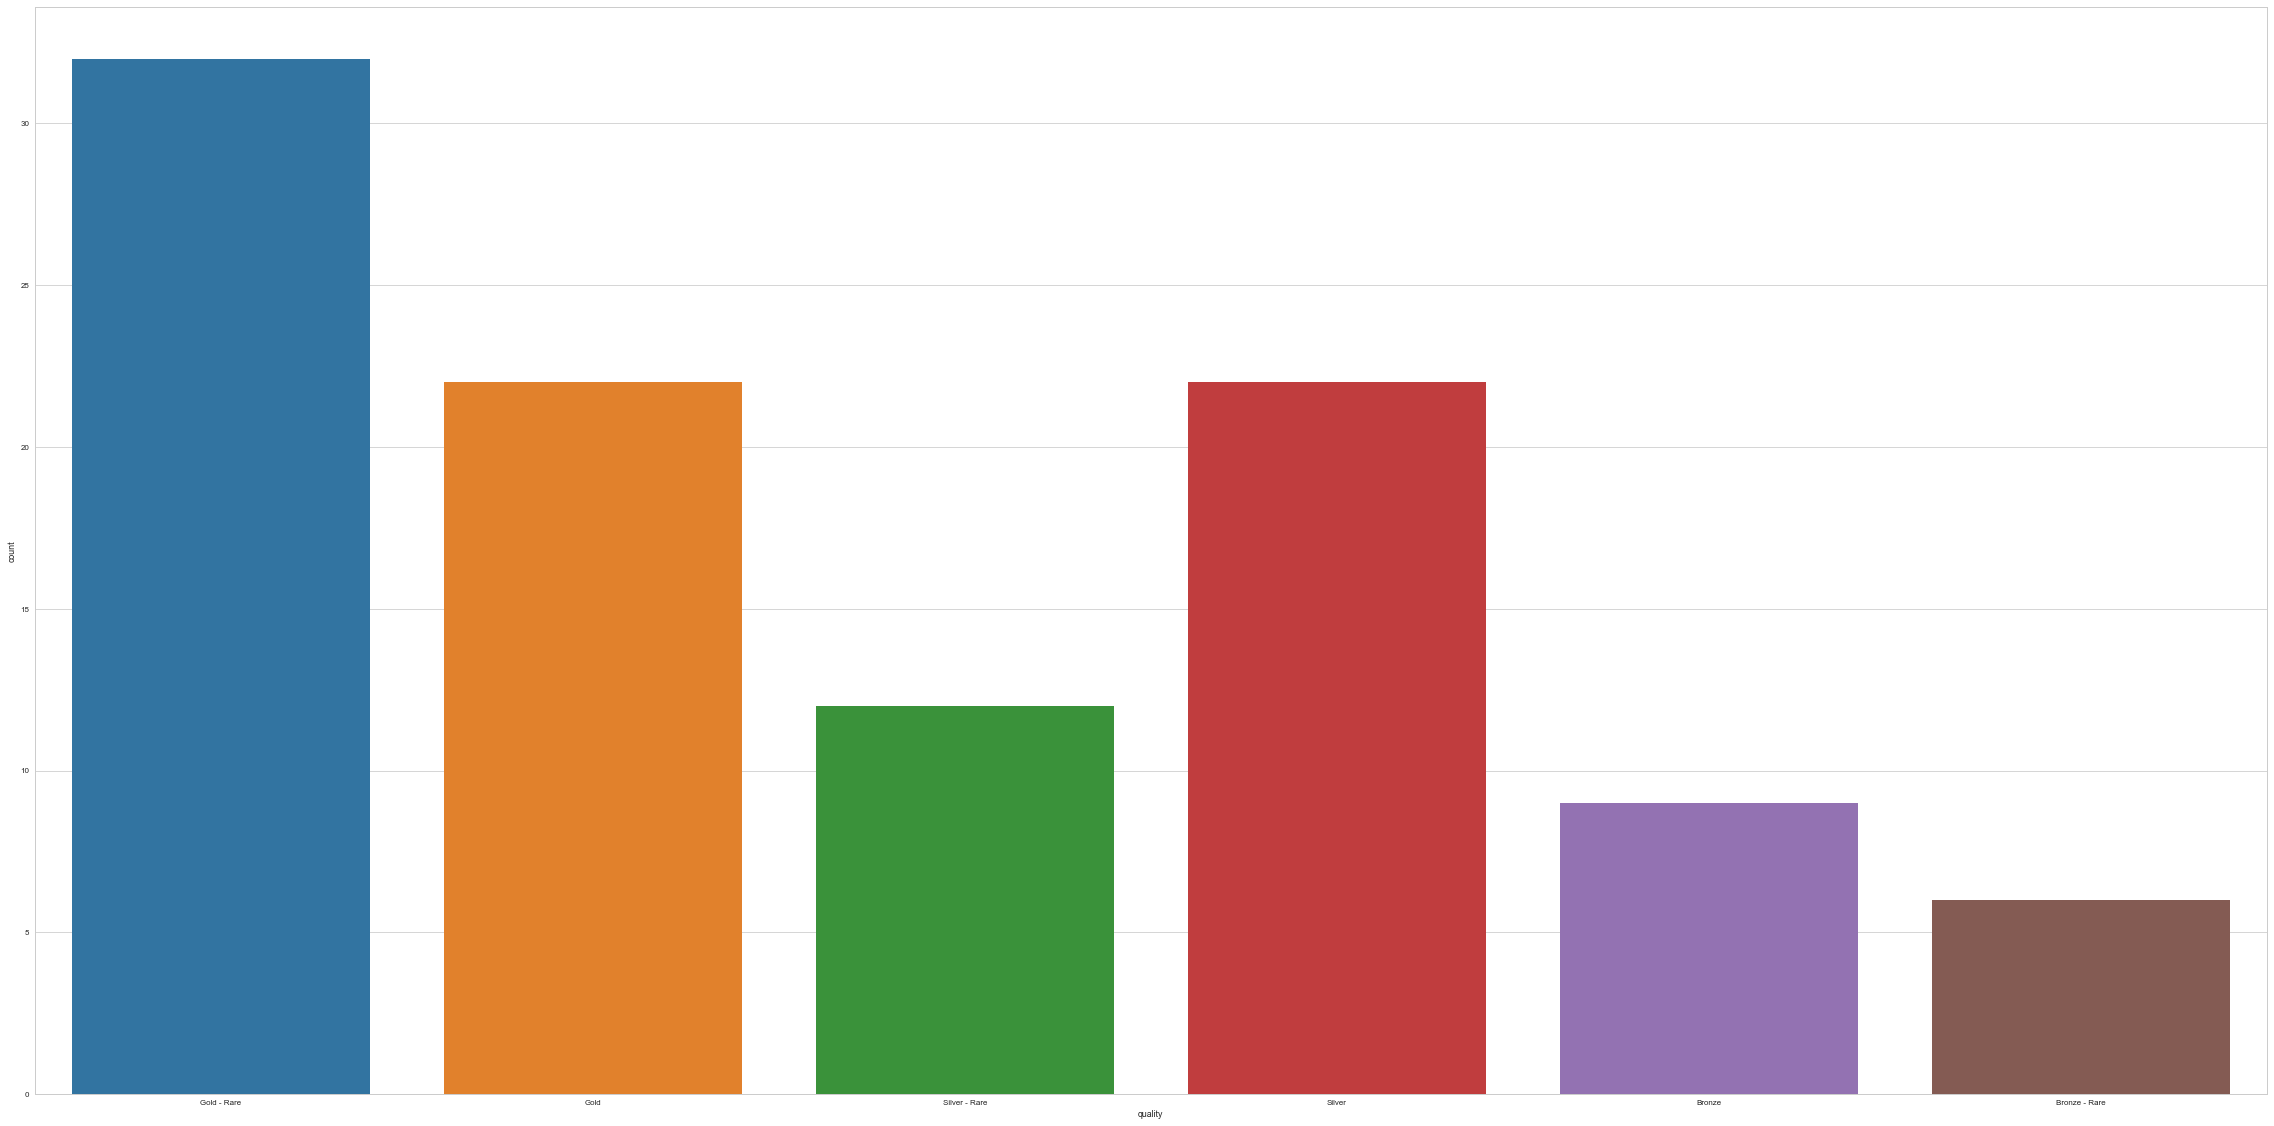

In [42]:
sns.countplot(league0.quality)

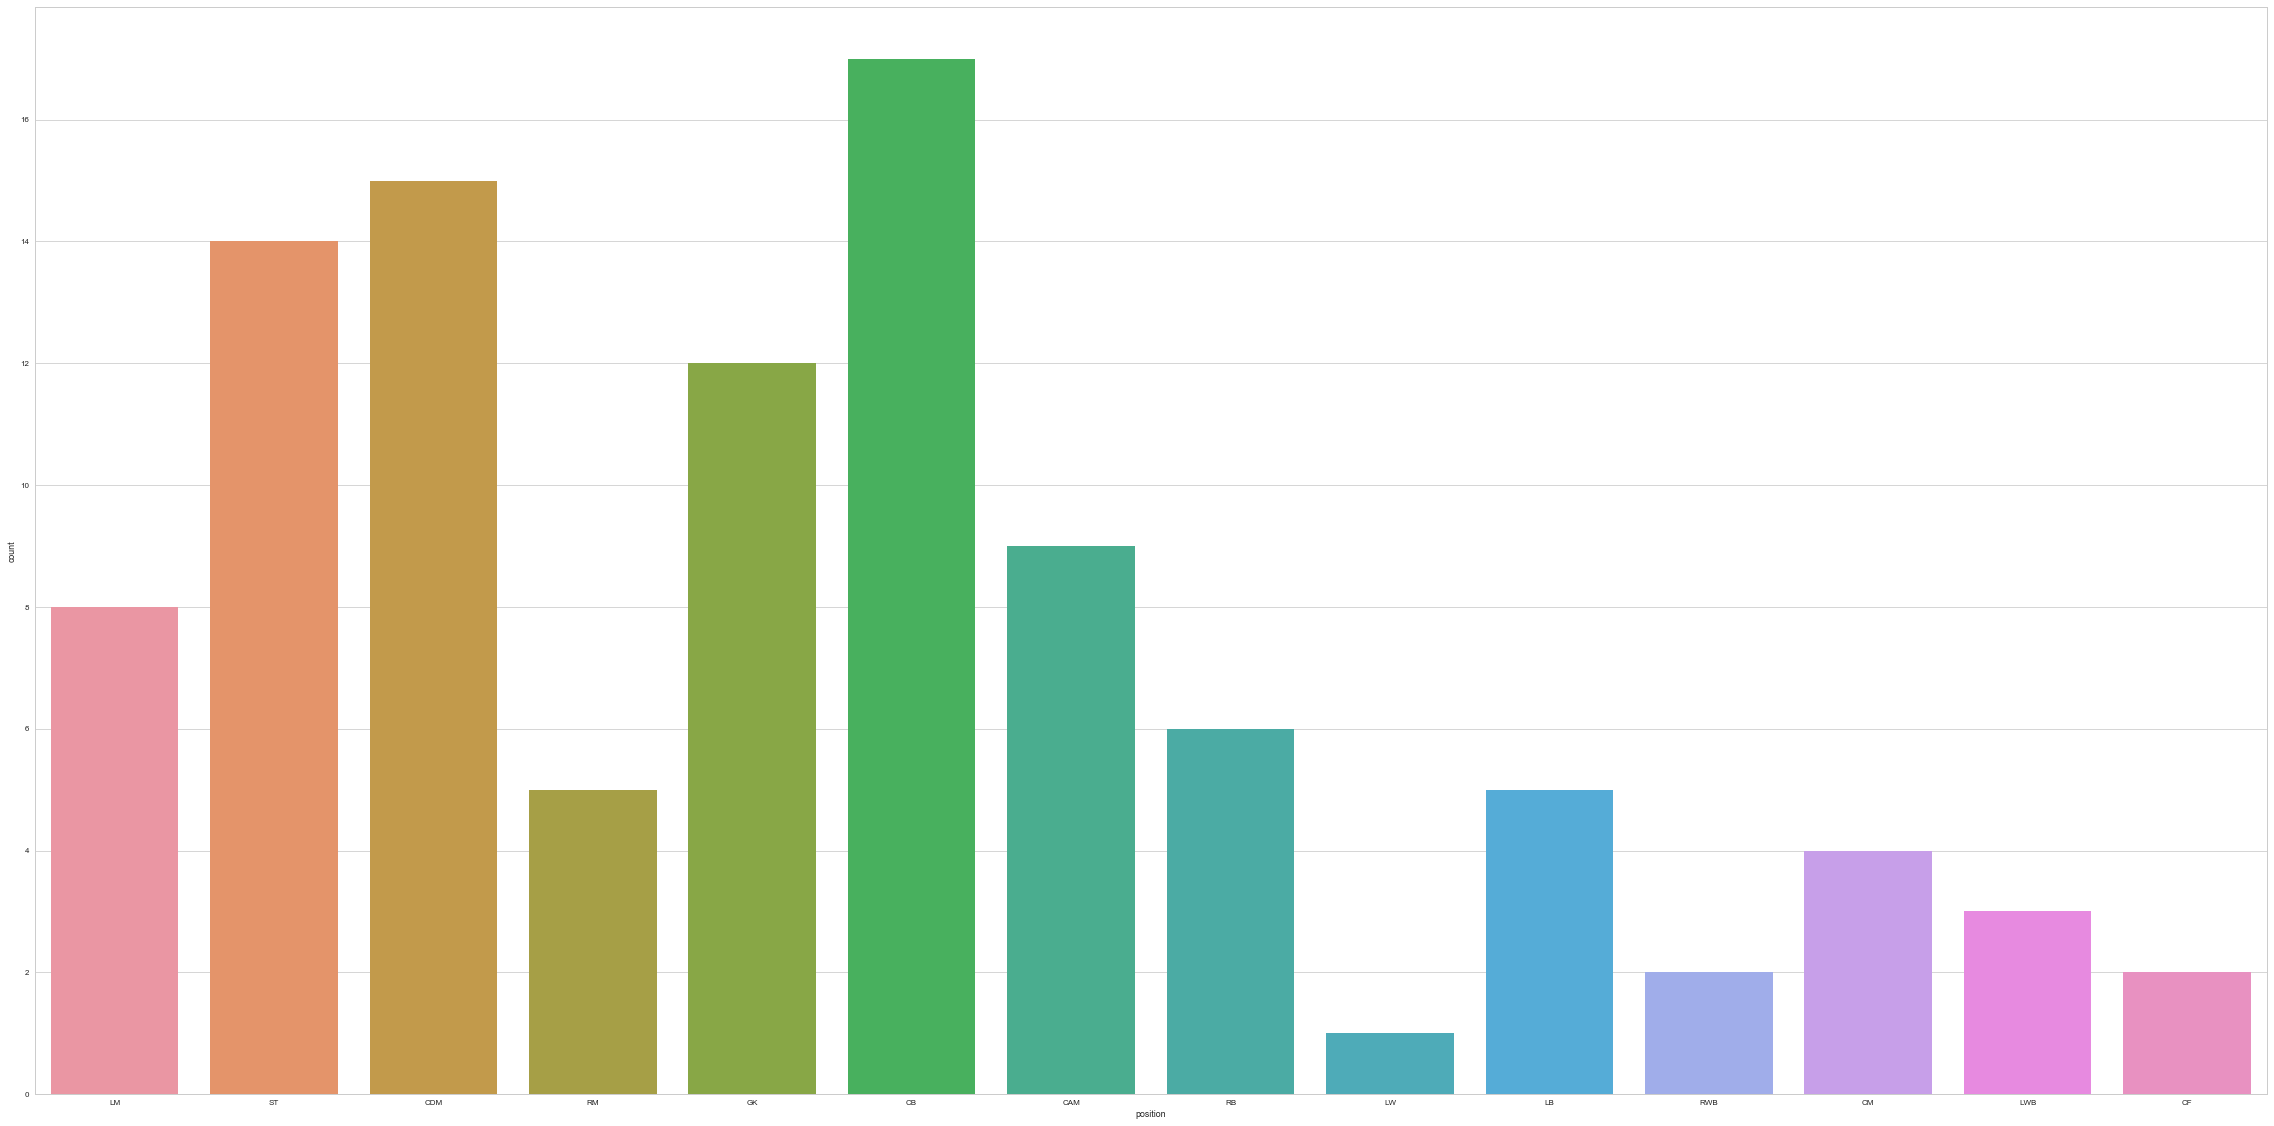

In [43]:
sns.countplot(league0.position)

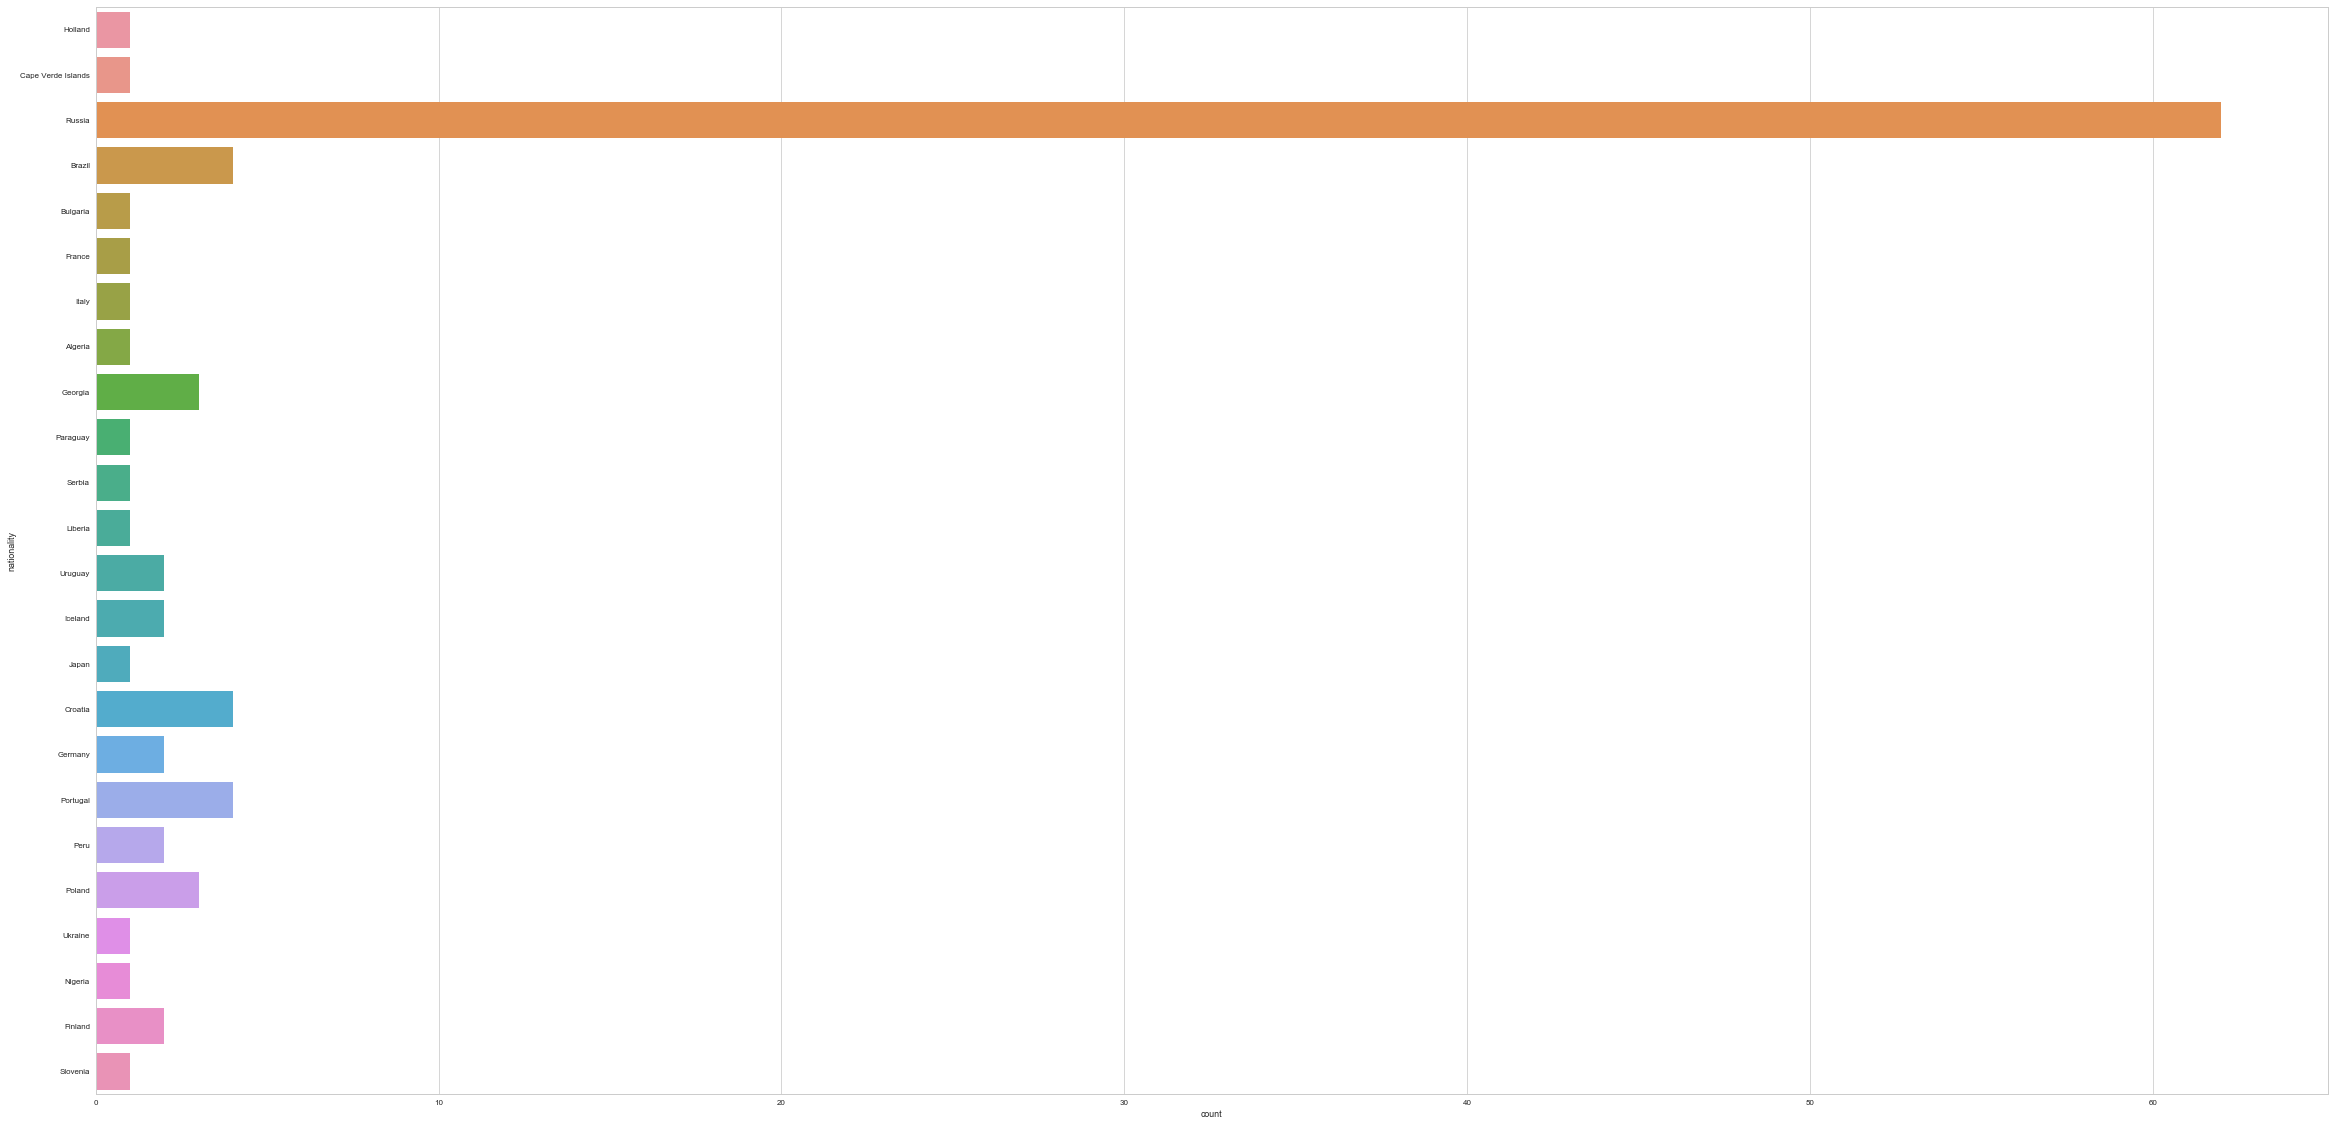

In [44]:
sns.countplot(y=league0.nationality)

In [57]:
selectColumns = ['player_extended_name', 'quality', 'club', 'nationality', 'position', 'overall','price_ps4']
players = league0.loc[
    #(league0.quality == 'Silver - Rare') 
    (league0.overall >= MINQUALITY) 
    #& (league0.nationality == 'Argentina') 
    & (league0.position == 'LM')
    , selectColumns]

players.sort_values(by= ['position','overall'], ascending=True)

,player_extended_name,quality,club,nationality,position,overall,price_ps4
3844,André Schürrle,Gold - Rare,Fulham,Germany,LM,78,1400.0
941,Roberto Pereyra,Gold,Watford,Argentina,LM,79,1300.0
1254,Mohamed Elyounoussi,Gold,Southampton,Norway,LM,79,1000.0
12854,Bernard Anício Caldeira Duarte,Gold - Rare,Everton,Brazil,LM,80,NaN
2424,Ryan Fraser,Gold - Rare,Bournemouth,Scotland,LM,81,16500.0
1097,Felipe Anderson Pereira Gomes,Gold - Rare,West Ham United,Brazil,LM,82,32000.0
518,Heung Min Son,Gold - Rare,Tottenham Hotspur,Korea Republic,LM,84,78000.0
16516,Felipe Anderson Pereira Gomes,Gold - Rare,West Ham United,Brazil,LM,84,108000.0
16543,Felipe Anderson Pereira Gomes,Gold - Rare,West Ham United,Brazil,LM,84,NaN
512,Heung Min Son,Gold - Rare,Tottenham Hotspur,Korea Republic,LM,85,200000.0
